# Unsupervised Machine-Learning

### with a focus on clustering with K-Means

Workshop led by Alina Arseniev-Koehler

**Outline:**

* Import libraries
* Load up Dataset
* Wrangle into shape for K-means
* Implement K-means in Sklearn
* Evaluate fit of k-means in Sklearn

As we go through the code - try *challenge activities* if you have extra time

**Import functions and libraries we'll need**

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

#tip: when possible, try to only import the specific functions you need from a library rather than the whole library, to save space. 

**A simulation!**

Let's create a fake dataset, where we *know* the latent structre. Since we've created it, we know what the latent structure actually is. But let's see if K-means clustering can *figure out this latent structure!* Then we'll compare the solution K-means comes up with, to how we expected the data to be clustered.


* Why/when do a simulation in your own research? You might use it to compare how well different methods work, or to develop methods, or to check your assumptions/robustness of your findings. Can be a good trick to add into methods and in response to reviewers!


In [12]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=.6, random_state=234)  
#what is make_blobs?   http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html 

Exploring the parameters of make_blobs:
    
* what is n_samples? 
* what is centers? 
* what is cluster_sd? 
* what is random_state? 

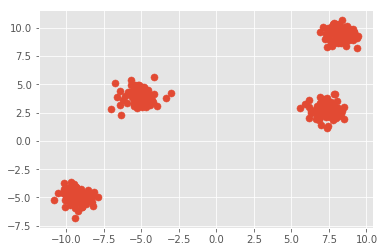

In [13]:
#Visualize our simulated data:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [30]:
#take a look at the raw data. What do X and y_true correspond to?
print(X, y_true)

[[-122.42589168   37.7745986 ]
 [-122.42589168   37.7745986 ]
 [-122.42436302   37.80041432]
 ..., 
 [-122.40339036   37.78026558]
 [-122.3905314    37.78060708]
 [-122.39492572   37.73821154]] [1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


**Reshape dataset for K-Means in Sklearn**

To get started, read up on [K-Means in SKlearn](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

* How does the kmeans function expect to see the data laid out for input? Write out the shape for some toy data..


In [4]:
df = pd.DataFrame({'x0': X[:, 0], 'x1': X[:, 1]}) 

In [13]:
df #view

 **Implement K-means in Sklearn **

In [50]:
kmeans_fitted = KMeans(n_clusters=5, random_state= 100).fit(X) #let's just try 5 for now 

In [ ]:
print(kmeans_fitted.cluster_centers_)   #print the centers of the 2 clusters. what do these mean? 

In [ ]:
print(kmeans_fitted.labels_) #print labels for the 

** How many clusters? Elbow Analysis in Sklearn **

Elbow analysis is one way to deterine how many clusters are in the data, since usually we are working with real data (not simulated) and don't know how many clusters we should expect! So, we compare clustering solutions for various numbers of clusters (k) to see which solution "fits" the best. 

In Elbow Analysis, "fit" is deteremined by the sum of squares. We look at how the sum of squares decreases as a function of the number of clusters. A sharp joint (elbow) in the decreased variation explained by adding additional clusters might occur at some number of k, suggesting that k-clusters might be the best fit.  

In [14]:
#Code adjusted from: https://pythonprogramminglanguage.com/kmeans-elbow-method/

#fill up "fits" object with a list of 
fits = []
K = range(1,10) #try even more than 10!
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    sum_cluster_dists= sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) #unpack this line!
    fits.append(sum_cluster_dists)

*What is cdist?* "Computes the distance between \(m\) points using Euclidean distance (2-norm) as the distance metric between the points. The points are arranged as \(m\) \(n\)-dimensional row vectors in the matrix X." [Source](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html).
    

In [9]:
kmeanModel.cluster_centers_ #what is this?
X.shape[0] #what is this? how would you modify the above code so that we are looking at AVERAGE error, rather than the sum?

300

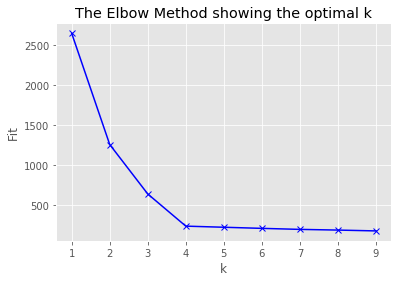

In [16]:
# Plot the elbow, adjusted from https://pythonprogramminglanguage.com/kmeans-elbow-method/
plt.plot(K, fits, 'bx-')
plt.xlabel('k')
plt.ylabel('Fit')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#extra time? try using another layout here, or making the graph prettier. 

Another, related strategy determining the number of clusters is called "Silohette" analysis. You can learn more [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), or take Soc 285 to learn more about clustering and unsupervised learning in general. 

**Compare predicted clusters versus actual clusters and visualize**

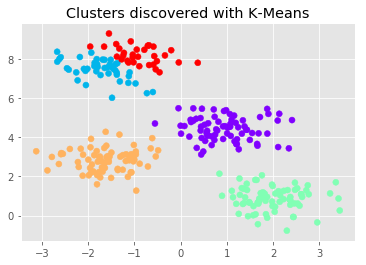

In [54]:
#first, lets visualize the predicted clusters

plt.scatter(X[:,0],X[:,1], c=kmeans_fitted.labels_, cmap='rainbow') 
plt.title('Clusters discovered with K-Means with Random Seed 100')
#plt.savefig('Clustering Solution with Random Seed 100 ') #saves the figure with this filename, in your working directory

Text(0.5,1,'Clusters with actual labels')

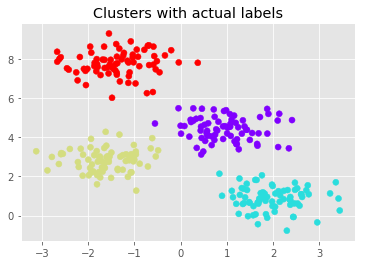

In [52]:
plt.scatter(X[:,0],X[:,1], c=y_true, cmap='rainbow') 
plt.title('Clusters with actual labels')

**What are some metrics to analyze the accuracy of our solution?**

In our unusual case, we actually KNOW the true cluster memberships of the data. This type of "labeled," latent data occurs, but rarely (Alina can give polysemy example).

Homogeneity:
* Homogeneity ranges 0 to 1. A clustering result satisfies homogeneity (homogenity=1) if all of its clusters contain only data points which are members of a single class. Homogeneity ranges 0-1. 

Completeness
* Completeness ranges 0 to 1. A clustering result satisfies completeness (completeness=1) if all the data points that are members of a given class are elements of the same cluster. Completeness ranges 0-1. 

V-measure:
* V-measure ranges 0 to 1. A perfect clustering solution has a v-measure of 1, and v-measures range 0-1. V-measure is the harmonic mean of homogeneity and completness. Specifically, $v = 2 \times (homogeneity \times completeness) / (homogeneity + completeness)$

More info on the [Sklearn implementations](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html).

More info on these metrics: 
* Rosenberg, Andrew, and Julia Hirschberg. "V-measure: A conditional entropy-based external cluster evaluation measure." Proceedings of the 2007 joint conference on empirical methods in natural language processing and computational natural language learning (EMNLP-CoNLL). 2007.

In [46]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, kmeans_fitted.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_true, kmeans_fitted.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_true, kmeans_fitted.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


## ** Activity #1 **

K-means works pretty well on our simulated blob data. But what if we didn't just have spherical blobs? What if, for example, we had moons? 

Let's try it out.

1. Replace where we generated the data using "make blobs", with this: X, y_true = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None) 

2. Run through the rest of the code above. 


How well does k-means do? 
If you weren't able to visualize the data in 2-dimensions, how would you know if the fit was good or bad?

## ** Activity #2 ** 

An issue with k-means, and many clustering algorithms, is that the algorithm is quite depending on the initial (randomly selected) centroids. This means that if you run the algoiriothm a few different times, you might get different solutions! 

Let's explore this issue. 

1. Generate simulated data using "make blobs"
2. Record the V-measure, Homogeniety, and Completeness from the current solution
3. Save the plot with the current solution, if you haven't already
4. Go back to the code where we fit a k-means solution, i.e., where we define "kmeans_fitted = "
5. Try changing "random_state" 
6. Re-run kmeans and code to visualize the clustering solution, and save this to your 
7. Repeat these steps a few times (at least 3 times), so that you get a few different solutions to compare. 

How does k-means solutions change across the initializations? Why is this an issue? What are ways to get around this in your own research applications using k-means? 

## ** Activity #3 ** 

**Let's try simulating some different datasets to get intuition about k-means:**

First, let's review the parameters we can change when creating our data with "make_blobs"
    
* what is n_samples? intuitively, do you think having more or less data makes it any easier to find latent strucutre? why or why not? 
* what is centers? do you think it is a harder task for k-means to find the correct latent structure with more or fewer centers?
* what is cluster_sd? would it be an easier or harder task for k-means to uncover the correct struture if this were smaller or larger? why?
* what is random_state? why would you want to use or not use this parameter?

Now, using the sample code we've worked through above, try changing data use make_blobs to answer some of the questions above:

* try increasing/decreasing the number of centers (e.g., try 2, 6, 12). Does k-means still get the right solution? 
* try increasing/decreasing the cluster_sd (e.g., try .05, 1, and/or to 3). Does k-means still get the right solution?

## **Activity #4: Try k-means on a *real* dataset!**
    

Dataset: 
* Access "train.csv" from this [Kaggle Competition](https://www.kaggle.com/c/sf-crime/data)
* Make sure "train.csv" is in your working directory! 

(Or, try clustering a dataset of your choice!)

In [25]:
traindat= pd.read_csv('train.csv')
traindat_selected= traindat[['X', 'Y']] #X and Y coordinates of the crime. Does 

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


**Visualize the Data**

Text(0.5,1,'X and Y coordinates of crime')

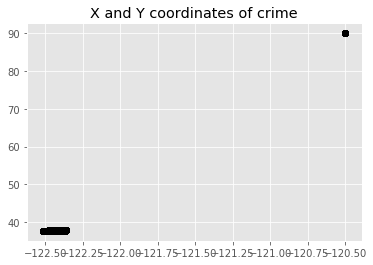

In [35]:
f1 = traindat_selected['X'].values
f2 = traindat_selected['Y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black')
plt.title('X and Y coordinates of crime')

#this isn't very pretty, if you have time, try changing up to prettyify

** Fit k-means **

In [27]:
kmeans_fitted = KMeans(n_clusters=2, random_state=234).fit(traindat_selected) #let's just try 2 for now 

#how do you select the number of clusters?
#what is "random state"?

** Below, implement code for Elbow Analysis (following example above) to determine how many clusters are ideal **

**Below, write out how many clusters you found, and try interpreting each cluster**

## **Activity #4: Writing K-Means from Scratch**

Follow this tutorial to implement K-means from scratch:
https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/

In your research, why would you implement an algorithm from scratch even if you could just use Sklearn?
* To customize the algorithm for some special feature
* To better understand the algorithm, or some surprising finding/bug
* To try to write the algorithm in a way that is more computationally efficient, if you had a lot of data